In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [3]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

검증손실 확인방법 history : fit(validation_data)

In [5]:
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.7673 - loss: 0.6826 - val_accuracy: 0.8396 - val_loss: 0.4459
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.8544 - loss: 0.4164 - val_accuracy: 0.8597 - val_loss: 0.3836
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.8712 - loss: 0.3565 - val_accuracy: 0.8711 - val_loss: 0.3591
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.8780 - loss: 0.3310 - val_accuracy: 0.8745 - val_loss: 0.3480
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.8877 - loss: 0.3100 - val_accuracy: 0.8626 - val_loss: 0.3814
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.8916 - loss: 0.2926 - val_accuracy: 0.8785 - val_loss: 0.3363
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.8952 - loss: 0.2803 - val_accuracy: 0.8820 - val_loss: 0.3252
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.8992 -

In [6]:
history.history['accuracy']
history.history['loss']

[0.5286369323730469,
 0.396578848361969,
 0.3522675633430481,
 0.32708972692489624,
 0.31170105934143066,
 0.2933485209941864,
 0.2827870845794678,
 0.26940658688545227,
 0.25996044278144836,
 0.24856071174144745,
 0.24079038202762604,
 0.23394614458084106,
 0.22920654714107513,
 0.21904079616069794,
 0.21406003832817078,
 0.207044318318367,
 0.20502547919750214,
 0.1979723572731018,
 0.1939823180437088,
 0.18788833916187286]

Text(0, 0.5, '손실률(loss)')

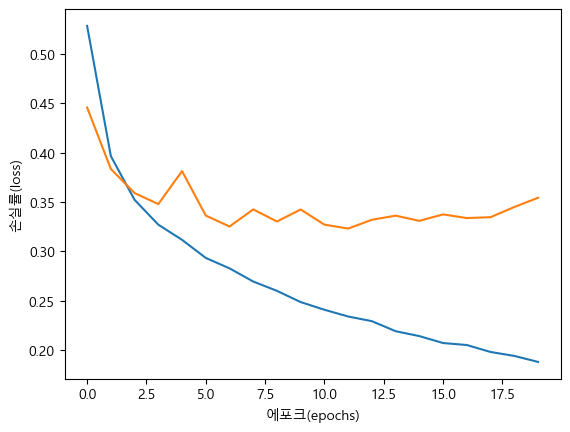

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')

Text(0, 0.5, '손실률(loss)')

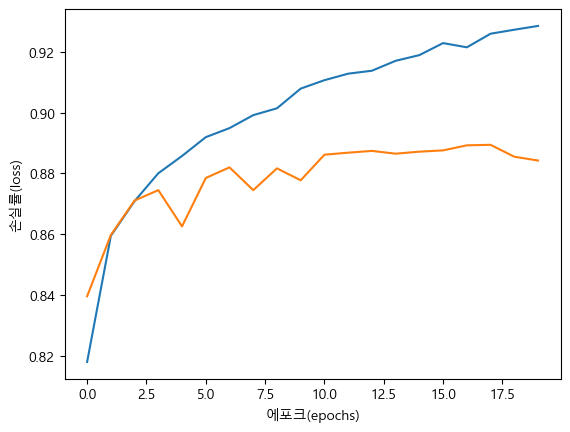

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')

In [11]:

# 모델결정        model = keras.Sequential()
# flatten층 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가    model.add(keras.layers.Dense(100,activation='relu'))
# Dropout 규제    model.add(keras.layers.Dropout(0.3))    # 30%를 제외시키는 규제 적용
# Dense층 추가    model.add(keras.layers.Dense(10,activation='softmax'))
# 구성확인        model.summary()
# 모델설정        model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련        model.fit(train_scaled,train_target,batch_size=32,epochs=5,,validation_data=(val_scaled,val_target))
# 모델평가        model.evaluate(val_scaled,val_target)

드롭아웃 규제적용 (과대적합 해결)
epochs 증가할 때 검증세트 정확도 down일 때.

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))    # 30%를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.7340 - loss: 0.7679 - val_accuracy: 0.8491 - val_loss: 0.4221
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8382 - loss: 0.4510 - val_accuracy: 0.8531 - val_loss: 0.3996
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.8510 - loss: 0.4112 - val_accuracy: 0.8640 - val_loss: 0.3671
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.8602 - loss: 0.3850 - val_accuracy: 0.8735 - val_loss: 0.3515
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.8679 - loss: 0.3626 - val_accuracy: 0.8608 - val_loss: 0.3784
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8696 - loss: 0.3568 - val_accuracy: 0.8749 - val_loss: 0.3413
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.8722 - loss: 0.3413 - val_accuracy: 0.8762 - val_loss: 0.3406
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.8712 -

Text(0, 0.5, '손실률(loss)')

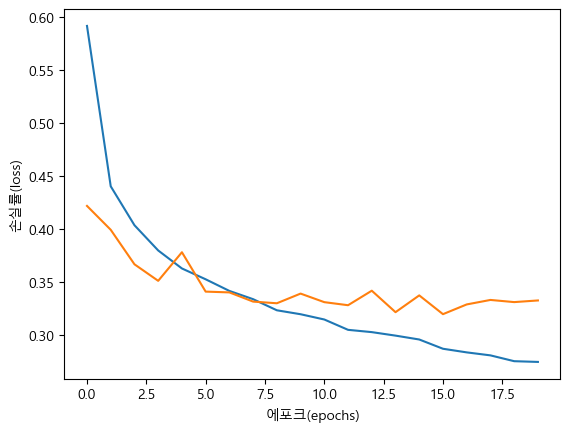

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')

Text(0, 0.5, '손실률(loss)')

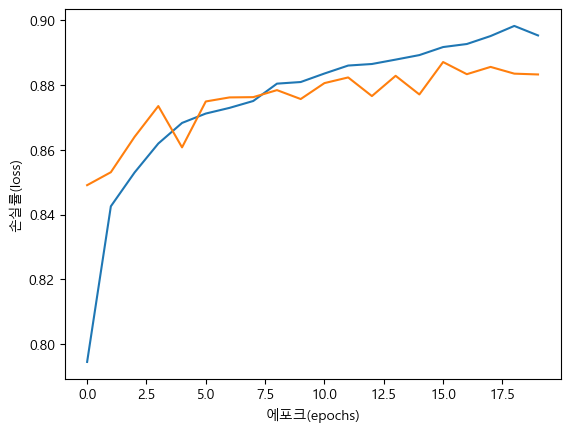

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도')

모델 저장과 복원
- save_weights : 가중치만 저장
- save : 모델 전체 저장

In [22]:
model.save_weights('model0529.weights.h5')

In [23]:
model.save('model_all.h5')